In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
credit = pd.read_csv(r'creditcard.csv')

In [3]:
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
print('Colunas', credit.shape[1])
print('Linhas', credit.shape[0])
print('Dados Unicos', credit.nunique())

Colunas 31
Linhas 284807
Dados Unicos Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64


In [5]:
print('Numero de Valores Nulos',credit.isnull().sum().sum())

Numero de Valores Nulos 0


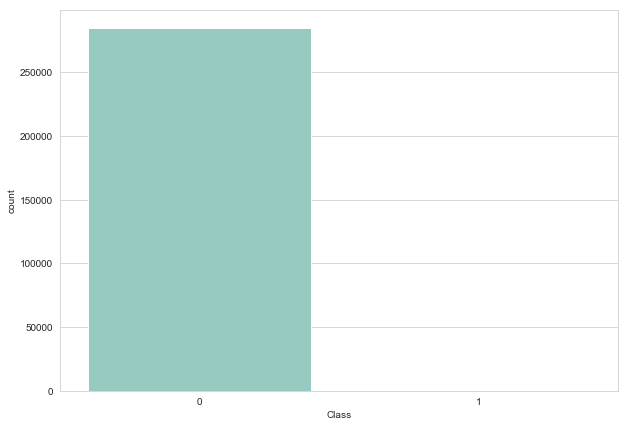

In [6]:
sns.set_style('whitegrid')
plt.figure(figsize = (10,7))

sns.countplot('Class',data = credit,palette = 'Set3')

In [7]:
print('Transações Não Fraudulentas', round(credit['Class'].value_counts()[0] / len(credit['Class']),3) * 100,'%')
print('Transações Fraudulentas', round(credit['Class'].value_counts()[1] / len(credit['Class']),3) * 100,'%')

Transações Não Fraudulentas 99.8 %
Transações Fraudulentas 0.2 %


In [8]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [9]:
fraud = credit.loc[credit['Class'] == 1,'Amount']
no_fraud = credit.loc[credit['Class'] == 0,'Amount']

Text(0.5, 0, 'Amount Fraudulento')

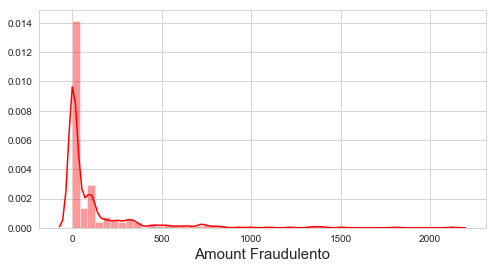

In [10]:
plt.figure(figsize = (8,4))
sns.distplot(fraud,color = 'r')
plt.xlabel('Amount Fraudulento',size = 15)

Text(0.5, 0, 'Amount Não Fraudulento')

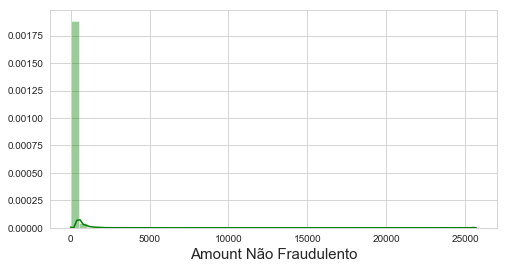

In [11]:
plt.figure(figsize = (8,4))
sns.distplot(no_fraud,color = 'g')
plt.xlabel('Amount Não Fraudulento',size = 15)

In [12]:
time_fraud = credit.loc[credit['Class'] == 1 ,'Time']
time_nofraud = credit.loc[credit['Class'] == 0 ,'Time']

Text(0.5, 0, 'Tempo_Transação Fraudulenta')

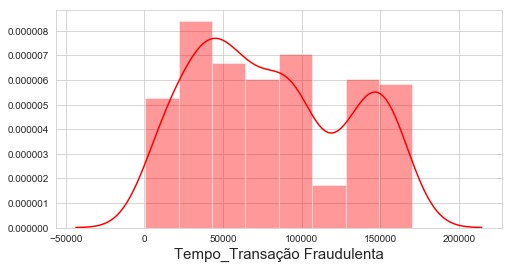

In [13]:
plt.figure(figsize = (8,4))
sns.distplot(time_fraud,color = 'r')
plt.xlabel('Tempo_Transação Fraudulenta',size = 15)

Text(0.5, 0, 'Tempo_Transação Não Fraudulenta')

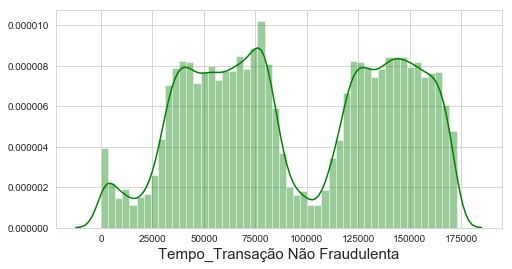

In [14]:
plt.figure(figsize = (8,4))
sns.distplot(time_nofraud,color = 'g')
plt.xlabel('Tempo_Transação Não Fraudulenta',size = 15)

In [15]:
from sklearn.preprocessing import StandardScaler, Normalizer

In [16]:
scaler = StandardScaler()

credit['Time2'] = scaler.fit_transform(credit['Time'].values.reshape(-1,1))
credit['Amount2'] = scaler.fit_transform(credit['Amount'].values.reshape(-1,1))

In [17]:
credit.drop(['Time','Amount'],axis = 1,inplace = True)

In [18]:
n_credit = credit.copy()

In [19]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

In [20]:
n_credit['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score

x = n_credit.drop('Class',axis = 1)
y = n_credit['Class']

x,y = sm.fit_sample(x,y)
    


In [22]:
np.bincount(y)

array([284315, 284315], dtype=int64)

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 101,test_size = 0.2)

In [24]:
lm = LogisticRegression()

lm.fit(x_train,y_train)
lm.score(x_train,y_train)



0.946828341803985

In [25]:
y_pred = lm.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.9471536851731355


In [ ]:
svm = SVC()
svm.fit(x_train,y_train)
svm.score(x_train,y_train)

In [ ]:
print(accuracy_score(y_test,y_pred))